In [1]:
import unicodecsv
import pandas as pd
#read data from CSV file and make it to lists
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)
    
 

In [2]:
users_all  =  pd.read_csv('../data_clean/customer.csv')

In [3]:
users_all[:5]

,CUSTOMER_ID,ADDRESS_POSTAL_CODE,Age_dirt
0,2083.0,20170.0,29.306849
1,2390.0,10250.0,31.528767
2,2406.0,10150.0,34.367123
3,2412.0,11110.0,28.320548
4,2413.0,11000.0,35.717808


# check types

In [4]:
users_all.dtypes

CUSTOMER_ID            float64
ADDRESS_POSTAL_CODE    float64
Age_dirt               float64
dtype: object

In [9]:
int(float('2083.0')).apply

AttributeError: 'int' object has no attribute 'apply'

# check max min

In [306]:
users_all.loc[users_all['Age_dirt'].idxmax()] 

CUSTOMER_ID            127807.000000
ADDRESS_POSTAL_CODE     22170.000000
Age_dirt                  129.205479
Name: 6472, dtype: float64

In [307]:
users_all.loc[users_all['Age_dirt'].idxmin()] 

CUSTOMER_ID            186282.000000
ADDRESS_POSTAL_CODE     10110.000000
Age_dirt                    0.115068
Name: 8962, dtype: float64

In [308]:
users = pd.DataFrame(users_all)
users[:5]

,CUSTOMER_ID,ADDRESS_POSTAL_CODE,Age_dirt
0,2083.0,20170.0,29.306849
1,2390.0,10250.0,31.528767
2,2406.0,10150.0,34.367123
3,2412.0,11110.0,28.320548
4,2413.0,11000.0,35.717808


 # change to array

In [309]:
age_array=users.as_matrix(columns=users.columns[2:])  
age_array

array([[ 29.30684932],
       [ 31.52876712],
       [ 34.36712329],
       ..., 
       [ 48.09315068],
       [ 29.90958904],
       [ 30.08219178]])

# histogram age

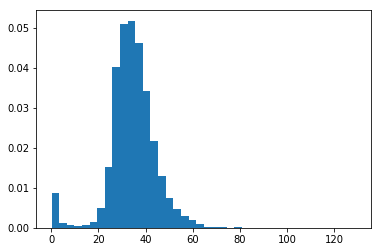

In [310]:
import matplotlib.pyplot as plt
import numpy as np

plot_age = age_array
plt.hist(plot_age, normed=True, bins=40)

plt.show()


In [311]:
h = sorted(users_all['Age_dirt'])

h[:5]

[0.11506849315068493,
 0.15068493150684931,
 0.15890410958904111,
 0.17260273972602741,
 0.17534246575342466]

In [312]:
f = sorted(users_all['Age_dirt'])

f[:5]

[0.11506849315068493,
 0.15068493150684931,
 0.15890410958904111,
 0.17260273972602741,
 0.17534246575342466]

# เปรียบเทียบระหว่างpopulation vs sample

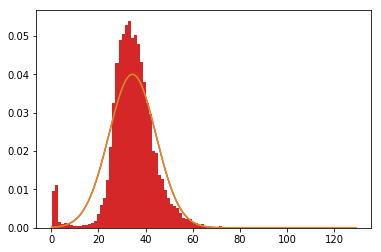

In [313]:
import numpy as np
import scipy.stats as stats
import pylab as pl

sample = stats.norm.pdf(h, np.mean(h), np.std(h))  
pop = stats.norm.pdf(f, np.mean(f), np.std(f, ddof = 1))  
pl.plot(h,sample,'')
pl.plot(f,sample,'')

pl.hist(h,normed=True, bins=100)  
pl.hist(f,normed=True, bins=100) 
      
pl.show()

# mean

In [314]:
import numpy as np

mean= np.mean(users_all['Age_dirt'])
mean

34.41218474729549

# standard deviation

In [315]:
sd= np.std(users_all['Age_dirt'])
sd

9.978966323666453

# กำหนดให้ mean +- sd

In [316]:
age_cut = pd.DataFrame(age_array ,columns=['Age'])
sd1 = age_cut [((mean-sd)<= age_cut['Age'] ) & (age_cut['Age']<= (mean+sd))]  
sd1.sort_values(by=['Age'])[:5]


,Age
6218,24.452055
1749,24.452055
4528,24.452055
6007,24.452055
8601,24.463014


In [317]:
sd1.loc[sd1['Age'] .idxmax()] 

Age    44.386301
Name: 2104, dtype: float64

# check type

In [278]:
age_cut.dtypes

Age    float64
dtype: object

In [318]:
age_cut_mat=sd1.as_matrix(columns=sd1.columns[0:])  
age_cut_mat[:5]

array([[ 29.30684932],
       [ 31.52876712],
       [ 34.36712329],
       [ 28.32054795],
       [ 35.71780822]])

In [319]:
age_cut_mat = sorted(sd1['Age'])
age_cut_mat[:5]

[24.452054794520549,
 24.452054794520549,
 24.452054794520549,
 24.452054794520549,
 24.463013698630142]

# plot mean+-sd1

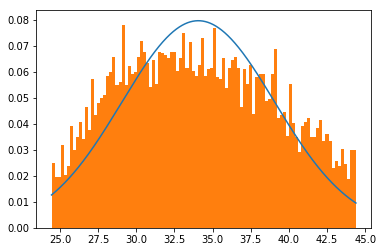

In [320]:
import numpy as np
import scipy.stats as stats
import pylab as pl

sample = stats.norm.pdf(age_cut_mat, np.mean(age_cut_mat), np.std(age_cut_mat))  
pl.plot(age_cut_mat,sample,'')


pl.hist(age_cut_mat,normed=True, bins=100)  

pl.show()

# กำหนดให้ mean +- sd*2

In [282]:
age_cut2 = pd.DataFrame(age_array ,columns=['Age'])
sd2 = age_cut2 [((mean-sd*2)<= age_cut2['Age'] ) & (age_cut2['Age']<= (mean+sd*2))]  
sd2.sort_values(by=['Age'])[:5]

,Age
3872,14.479452
9010,14.824658
7190,14.846575
5613,14.991781
4981,15.227397


In [283]:
age_cut_mat2=sd2.as_matrix(columns=sd2.columns[0:])  
age_cut_mat2[:5]

array([[ 29.30684932],
       [ 31.52876712],
       [ 34.36712329],
       [ 28.32054795],
       [ 35.71780822]])

In [284]:
age_cut_mat2 = sorted(sd2['Age'])
age_cut_mat2[:5]

[14.479452054794519,
 14.824657534246574,
 14.846575342465751,
 14.991780821917805,
 15.227397260273971]

# plot mean+-sd*2

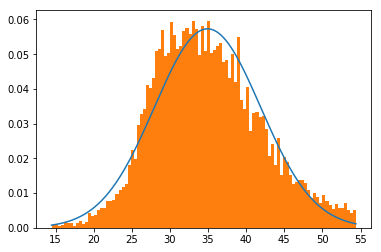

In [285]:
import numpy as np
import scipy.stats as stats
import pylab as pl

sample = stats.norm.pdf(age_cut_mat2, np.mean(age_cut_mat2), np.std(age_cut_mat2))  
pl.plot(age_cut_mat2,sample,'')


pl.hist(age_cut_mat2,normed=True, bins=100)  

pl.show()

# กำหนด ให้ mean+-sd*3

In [286]:
age_cut3 = pd.DataFrame(age_array ,columns=['Age'])
sd3 = age_cut3 [((mean-sd*3)<= age_cut3['Age'] ) & (age_cut3['Age']<= (mean+sd*3))]  
df_age = sd3.sort_values(by=['Age'])
df_age[:5]

,Age
4655,4.709589
1228,4.906849
1711,4.967123
75,5.076712
5402,5.123288


In [287]:
id_cus = users['CUSTOMER_ID'] 
id_cus[:5]

0    2083
1    2390
2    2406
3    2412
4    2413
Name: CUSTOMER_ID, dtype: int64

In [288]:
df_id = pd.DataFrame(id_cus)
df_id [:5]

,CUSTOMER_ID
0,2083
1,2390
2,2406
3,2412
4,2413


In [297]:
customer_age = pd.concat([df_id,age_real], axis=1)
customer_age[:5]

,CUSTOMER_ID,Age
0,2083,29.306849
1,2390,31.528767
2,2406,34.367123
3,2412,28.320548
4,2413,35.717808


In [298]:
pd.isnull(customer_age).sum() > 0

CUSTOMER_ID    False
Age             True
dtype: bool

In [299]:
cus_age_notnull = customer_age[customer_age['Age'].notnull()& (customer_age['CUSTOMER_ID'].notnull())]
cus_age_notnull[:5]

,CUSTOMER_ID,Age
0,2083,29.306849
1,2390,31.528767
2,2406,34.367123
3,2412,28.320548
4,2413,35.717808


In [300]:
pd.isnull(cus_age_notnull).sum() > 0

CUSTOMER_ID    False
Age            False
dtype: bool

In [301]:
cus_age_notnull.to_csv('../data_clean/customer_age.csv',index=False)

In [74]:
age_cut_mat3=sd3.as_matrix(columns=sd3.columns[0:])  
age_cut_mat3[:5]

array([[ 29.30684932],
       [ 31.52876712],
       [ 34.36712329],
       [ 28.32054795],
       [ 35.71780822]])

In [75]:
age_cut_mat3 = sorted(sd3['Age'])
age_cut_mat3[:5]

[15.227397260273971,
 15.243835616438355,
 15.257534246575347,
 15.449315068493151,
 15.493150684931507]

# plot mean+-sd*3

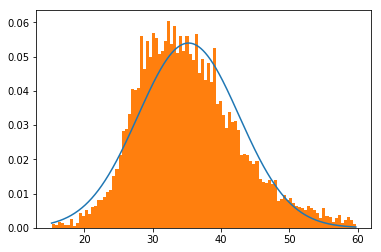

In [76]:
import numpy as np
import scipy.stats as stats
import pylab as pl

sample = stats.norm.pdf(age_cut_mat3, np.mean(age_cut_mat3), np.std(age_cut_mat3))  
pl.plot(age_cut_mat3,sample,'')


pl.hist(age_cut_mat3,normed=True, bins=100)  

pl.show()

# histogram age&user

In [77]:
order_age =  pd.read_csv('../data_clean/order.csv')

In [78]:
order_age[:5]

,ORDER_ID,CUSTOMER_ID,BPCODE,CREATE_DATE,UPDATE_DATE,STATUS,ORDER_ITEM_ID,MATNR,QUANTITY,TOTAL_PRICE
0,2321,4223,1100702550,2015-10-16 15:36:00,2015-10-16 15:42:00,PAID_SUCCESS,2281,19110489,1,7900.0
1,2481,2509,1100605014,2015-10-18 20:50:00,2015-10-18 20:58:00,PAID_SUCCESS,2421,19110830,1,9900.0
2,2781,5445,1100703863,2015-10-26 11:22:00,2015-10-26 11:25:00,PAID_SUCCESS,2701,19047937,1,3640.0
3,2781,5445,1100703863,2015-10-26 11:22:00,2015-10-26 11:25:00,PAID_SUCCESS,2702,19047936,1,1050.0
4,2781,5445,1100703863,2015-10-26 11:22:00,2015-10-26 11:25:00,PAID_SUCCESS,2703,59008843,1,19900.0


In [79]:
df_order= pd.DataFrame(order_age ,columns=['ORDER_ITEM_ID'])
df_order [:5]

,ORDER_ITEM_ID
0,2281
1,2421
2,2701
3,2702
4,2703


In [80]:
df_id_cus= pd.DataFrame(users_all ,columns=['CUSTOMER_ID'])
df_id_cus[:5]

,CUSTOMER_ID
0,2083
1,2390
2,2406
3,2412
4,2413


In [81]:
df_id_order= pd.DataFrame(order_age ,columns=['CUSTOMER_ID'])
df_id_order[:5]

,CUSTOMER_ID
0,4223
1,2509
2,5445
3,5445
4,5445


# รวมแถว id ที่มีอายุ กับ id ที่สั่งของ

In [87]:
left = df_id_cus
right = df_id_order

intersec = pd.merge(left, right, on='CUSTOMER_ID')
intersec[:5]


,CUSTOMER_ID
0,2082
1,2082
2,2082
3,2082
4,2082


In [88]:
sd3[:5]

,Age
0,29.306849
1,31.528767
2,34.367123
3,28.320548
4,35.717808


# รวม id ที่มีทั้งอายุและสั่งของ

In [102]:
id_age = pd.concat([intersec, sd3], axis=1, join='outer')
id_age[:4]

,CUSTOMER_ID,Age
0,2082.0,29.306849
1,2082.0,31.528767
2,2082.0,34.367123
3,2082.0,28.320548


In [105]:
len(id_age)

10123

In [112]:
age_notnull = id_age[id_age['Age'].notnull()]
age_notnull[:5]

,CUSTOMER_ID,Age
0,2082.0,29.306849
1,2082.0,31.528767
2,2082.0,34.367123
3,2082.0,28.320548
4,2082.0,35.717808


In [128]:
id_notnull = age_notnull[age_notnull['CUSTOMER_ID'].notnull()]
id_notnull[:5]

,CUSTOMER_ID,Age
0,2082.0,29.306849
1,2082.0,31.528767
2,2082.0,34.367123
3,2082.0,28.320548
4,2082.0,35.717808


In [130]:
len(id_notnull)

5712

In [132]:
pd.isnull(id_notnull).sum()>0

CUSTOMER_ID    False
Age            False
dtype: bool

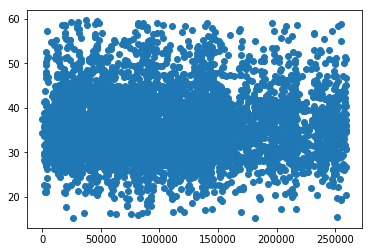

In [134]:
import matplotlib.pyplot as plt
plt.scatter(id_notnull['CUSTOMER_ID'], id_notnull['Age'])
plt.show()